In [0]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 2us/step


In [0]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt


In [0]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data /= std

In [0]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [0]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
  print('processing fold #',i)
  val_data=train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model=build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)





processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
np.mean(all_scores)

2.518235206604004

In [0]:
###the correct way to do K fold cross validation ####
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_histories=[]

for i in range(k):
  print('processing fold #',i)
  val_data=train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)

  model=build_model()
  history=model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0,validation_data=[val_data,val_targets])
  mae_history=history.history['val_mae']
  print(mae_history)
  all_mae_histories.append(mae_history)





processing fold # 0
[3.903730869293213, 2.8373630046844482, 2.868920087814331, 2.6234660148620605, 2.306896448135376, 2.320683479309082, 2.2378621101379395, 2.1954185962677, 2.1143124103546143, 2.18786358833313, 2.150416374206543, 2.2734084129333496, 2.1071438789367676, 2.1836464405059814, 2.063124179840088, 1.9927350282669067, 2.161724805831909, 2.2738046646118164, 2.349184036254883, 2.091975688934326, 2.0158767700195312, 2.153965473175049, 2.081369638442993, 1.9385261535644531, 1.996462345123291, 1.9839597940444946, 2.0558407306671143, 2.2397499084472656, 2.379283905029297, 1.9012808799743652, 2.299696922302246, 1.8655548095703125, 2.0631446838378906, 1.9794514179229736, 2.369641065597534, 1.8585163354873657, 2.2197799682617188, 1.9131381511688232, 2.1131865978240967, 1.9655766487121582, 1.8982985019683838, 2.029910087585449, 2.037919521331787, 2.116793394088745, 1.9505467414855957, 2.0345561504364014, 2.007603168487549, 2.0515613555908203, 2.150334358215332, 2.088573694229126, 2.003

In [0]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

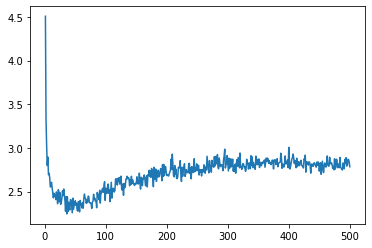

In [30]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)

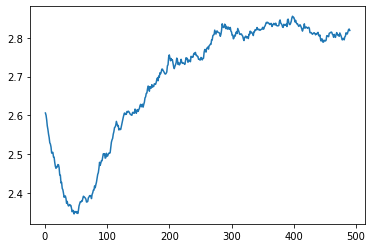

In [32]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append((previous*factor)+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)

In [34]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16)
res=model.evaluate(test_data,test_targets)
print(res)

Epoch 1/80
404/404 [==============================] - 0s 284us/step - loss: 482.3815 - mae: 19.9720
Epoch 2/80
404/404 [==============================] - 0s 133us/step - loss: 293.8864 - mae: 14.9330
Epoch 3/80
404/404 [==============================] - 0s 155us/step - loss: 132.2181 - mae: 9.2103
Epoch 4/80
404/404 [==============================] - 0s 130us/step - loss: 65.2271 - mae: 6.0688
Epoch 5/80
404/404 [==============================] - 0s 157us/step - loss: 40.9178 - mae: 4.5598
Epoch 6/80
404/404 [==============================] - 0s 134us/step - loss: 30.7182 - mae: 3.8135
Epoch 7/80
404/404 [==============================] - 0s 132us/step - loss: 25.6334 - mae: 3.4836
Epoch 8/80
404/404 [==============================] - 0s 144us/step - loss: 22.3142 - mae: 3.1883
Epoch 9/80
404/404 [==============================] - 0s 132us/step - loss: 20.1200 - mae: 3.0140
Epoch 10/80
404/404 [==============================] - 0s 132us/step - loss: 18.4969 - mae: 2.9201
Epoch 11/80
40